# TME2

In [18]:
import gym
import gridworld

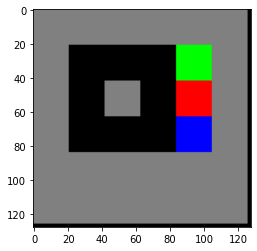

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [19]:
env = gym.make('gridworld-v0')
env.reset()
env.render()